In [1]:
import torch
import torch.nn.functional as F
import csv
import numpy as np
import random
import itertools
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# https://vincentarelbundock.github.io/Rdatasets/datasets.html
# https://www.rdocumentation.org/packages/MASS/versions/7.3-53/topics/birthwt
p = '/app/Contrastive-Learning-Benchmarking//data/birthwt.csv'

with open(p, 'r') as file:
    my_reader = csv.reader(file, delimiter=',')
    rows = [r for r in my_reader]
    
rows

[['', 'low', 'age', 'lwt', 'race', 'smoke', 'ptl', 'ht', 'ui', 'ftv', 'bwt'],
 ['85', '0', '19', '182', '2', '0', '0', '0', '1', '0', '2523'],
 ['86', '0', '33', '155', '3', '0', '0', '0', '0', '3', '2551'],
 ['87', '0', '20', '105', '1', '1', '0', '0', '0', '1', '2557'],
 ['88', '0', '21', '108', '1', '1', '0', '0', '1', '2', '2594'],
 ['89', '0', '18', '107', '1', '1', '0', '0', '1', '0', '2600'],
 ['91', '0', '21', '124', '3', '0', '0', '0', '0', '0', '2622'],
 ['92', '0', '22', '118', '1', '0', '0', '0', '0', '1', '2637'],
 ['93', '0', '17', '103', '3', '0', '0', '0', '0', '1', '2637'],
 ['94', '0', '29', '123', '1', '1', '0', '0', '0', '1', '2663'],
 ['95', '0', '26', '113', '1', '1', '0', '0', '0', '0', '2665'],
 ['96', '0', '19', '95', '3', '0', '0', '0', '0', '0', '2722'],
 ['97', '0', '19', '150', '3', '0', '0', '0', '0', '1', '2733'],
 ['98', '0', '22', '95', '3', '0', '0', '1', '0', '0', '2751'],
 ['99', '0', '30', '107', '3', '0', '1', '0', '1', '2', '2750'],
 ['100', '0', 

In [3]:
bwt = [int(r[rows[0].index('bwt')])//100 * 100 for r in rows[1:]]
age = [float(r[rows[0].index('age')]) for r in rows[1:]]
race = [r[rows[0].index('race')] for r in rows[1:]]

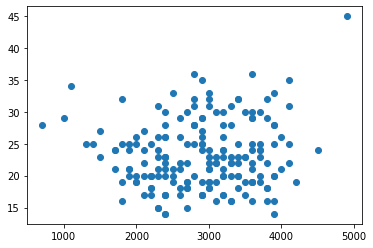

In [4]:
plt.scatter(bwt, age)

In [5]:
max(bwt), min(bwt)

(4900, 700)

In [6]:
max(age), min(age)

(45.0, 14.0)

In [7]:
# x axis -- age -- 14-36
# y axis -- bwt -- 7-45
count_table = np.zeros((36-14+1, 45-7+1))

for a, w in zip(age, bwt):
    if w <= 4500 or a <= 36:
        count_table[int(a)-14,int(w/100)-7] += 1
 

xy = count_table/np.sum(count_table) + 0.00001
xy = xy/np.sum(xy)

In [8]:
np.sum(count_table)

188.0

In [9]:
xy

array([[9.91109746e-06, 9.91109746e-06, 9.91109746e-06, 9.91109746e-06,
        9.91109746e-06, 9.91109746e-06, 9.91109746e-06, 9.91109746e-06,
        9.91109746e-06, 9.91109746e-06, 9.91109746e-06, 9.91109746e-06,
        9.91109746e-06, 9.91109746e-06, 9.91109746e-06, 9.91109746e-06,
        9.91109746e-06, 1.05536318e-02, 9.91109746e-06, 9.91109746e-06,
        9.91109746e-06, 9.91109746e-06, 9.91109746e-06, 9.91109746e-06,
        9.91109746e-06, 9.91109746e-06, 9.91109746e-06, 9.91109746e-06,
        9.91109746e-06, 9.91109746e-06, 9.91109746e-06, 9.91109746e-06,
        5.28177145e-03, 9.91109746e-06, 9.91109746e-06, 9.91109746e-06,
        9.91109746e-06, 9.91109746e-06, 9.91109746e-06],
       [9.91109746e-06, 9.91109746e-06, 9.91109746e-06, 9.91109746e-06,
        9.91109746e-06, 9.91109746e-06, 9.91109746e-06, 9.91109746e-06,
        9.91109746e-06, 9.91109746e-06, 9.91109746e-06, 9.91109746e-06,
        9.91109746e-06, 9.91109746e-06, 9.91109746e-06, 9.91109746e-06,
       

In [10]:
xy.shape

(23, 39)

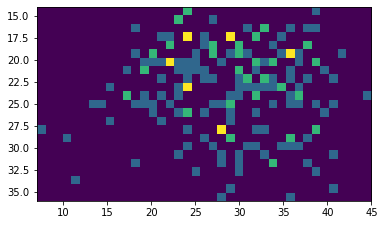

In [11]:
plt.imshow(xy, extent=[7,45,36,14])

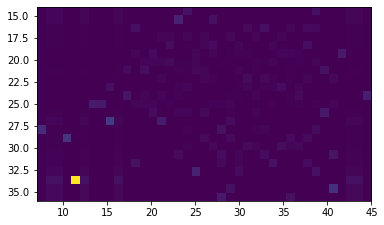

In [12]:
x = np.sum(xy,0)
y = np.sum(xy,1)
xyind = y[None].T @ x[None]
plt.imshow(xy/xyind, extent=[7,45,36,14])

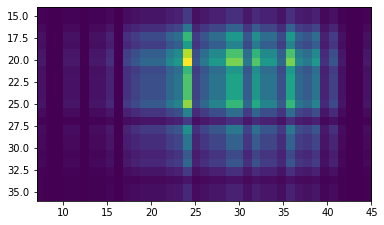

In [13]:
plt.imshow(xyind, extent=[7,45,36,14])

## How to recover xy from F

In [14]:
k = 35.23423
f = torch.tensor(xy/xyind * k)
####################

def recover_xy(f, xy, xyind):
    k_hat = torch.sum(f) / torch.sum(torch.tensor(xy/xyind))
    xy_hat = f / k_hat * xyind
    proposal = xy_hat
    print(F.kl_div(torch.log(proposal), torch.from_numpy(xy)))
    
recover_xy(f, xy, xyind)

tensor(5.2249e-20, dtype=torch.float64)


/home/user/miniconda/lib/python3.8/site-packages/torch/nn/functional.py:2398: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


In [15]:
k_xy_hat = f * xyind

In [18]:
k_xy_hat / torch.sum(k_xy_hat)

tensor([[9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06,
         9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06,
         9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 1.0554e-02,
         9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06,
         9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06,
         9.9111e-06, 9.9111e-06, 5.2818e-03, 9.9111e-06, 9.9111e-06, 9.9111e-06,
         9.9111e-06, 9.9111e-06, 9.9111e-06],
        [9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06,
         9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06,
         9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 1.0554e-02, 9.9111e-06,
         9.9111e-06, 9.9111e-06, 5.2818e-03, 9.9111e-06, 9.9111e-06, 9.9111e-06,
         9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06,
         9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111e-06, 9.9111

## Experiments

In [13]:
def run_expr4(n_batch, iters):
    '''
    model pxy directly
    '''
    torch.manual_seed(42)
    
    M = torch.randn(xy.shape, requires_grad = True)
    print(M[0, :5])
    
    optimizer = torch.optim.SGD([M],1, 0.99)
    Mbar = M.data

    history = {'loss':[]}
    
    for iteration in tqdm(range(1,iters)):

        samples = [np.random.choice(range(xy.reshape(-1).shape[0]), p=xy.reshape(-1)) for i in range(n_batch)]
        samples = np.array([(xi//x.shape[0], xi%x.shape[0]) for xi in samples])
#         import pdb; pdb.set_trace()
        
        optimizer.zero_grad()

        F = torch.exp(M)

        loss = 0
        for i in range(n_batch):
            lossi = F[samples[i,0],samples[i,1]]/torch.sum(F[:,:])
            loss = loss + torch.log(lossi) 
        loss = -1*loss/n_batch
        loss.backward()
        optimizer.step()
        history['loss'].append(loss.item())
        Mbar = (1-1/iteration)*Mbar + (1/iteration)*M.data

        if iteration % 1000 == 0:
            print(torch.var(M))
            plt.imshow(Mbar.detach().cpu().numpy(), extent=[7,45,36,14])
            plt.savefig(f"birthwt_training_results/Mbar_joint_{n_batch}_{iteration}.png")

    np.save(f'birthwt_training_results/Mbar_joint_{n_batch}_{iteration}.npy', Mbar.detach().cpu().numpy())
    np.save(f'birthwt_training_results/M_joint_{n_batch}_{iteration}.npy', M.detach().cpu().numpy())
    np.save(f'birthwt_training_results/training_loss_joint_{n_batch}_{iteration}.npy', np.array(history['loss']))
    return M, Mbar, history

  0%|          | 12/99999 [00:00<14:14, 116.96it/s]

tensor([ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784], grad_fn=<SliceBackward>)


  1%|          | 1010/99999 [00:07<13:45, 119.93it/s]

tensor(20.9457, grad_fn=<VarBackward0>)


  2%|▏         | 2015/99999 [00:15<14:32, 112.36it/s]

tensor(10.5617, grad_fn=<VarBackward0>)


  3%|▎         | 3020/99999 [00:22<12:48, 126.17it/s]

tensor(8.8270, grad_fn=<VarBackward0>)


  4%|▍         | 4016/99999 [00:29<12:24, 128.93it/s]

tensor(7.7296, grad_fn=<VarBackward0>)


  5%|▌         | 5007/99999 [00:36<12:52, 122.90it/s]

tensor(7.6070, grad_fn=<VarBackward0>)


  6%|▌         | 6020/99999 [00:43<12:19, 127.10it/s]

tensor(7.1555, grad_fn=<VarBackward0>)


  7%|▋         | 7017/99999 [00:51<13:15, 116.85it/s]

tensor(6.8291, grad_fn=<VarBackward0>)


  8%|▊         | 8018/99999 [00:58<12:11, 125.71it/s]

tensor(6.5674, grad_fn=<VarBackward0>)


  9%|▉         | 9017/99999 [01:05<11:59, 126.51it/s]

tensor(6.7122, grad_fn=<VarBackward0>)


 10%|█         | 10014/99999 [01:12<12:37, 118.73it/s]

tensor(6.6036, grad_fn=<VarBackward0>)


 11%|█         | 11006/99999 [01:20<13:42, 108.17it/s]

tensor(6.6057, grad_fn=<VarBackward0>)


 12%|█▏        | 12016/99999 [01:28<13:25, 109.22it/s]

tensor(6.4301, grad_fn=<VarBackward0>)


 13%|█▎        | 13005/99999 [01:35<12:49, 113.03it/s]

tensor(6.3848, grad_fn=<VarBackward0>)


 14%|█▍        | 14010/99999 [01:42<13:11, 108.64it/s]

tensor(6.5941, grad_fn=<VarBackward0>)


 15%|█▌        | 15009/99999 [01:49<12:46, 110.83it/s]

tensor(6.7021, grad_fn=<VarBackward0>)


 16%|█▌        | 16002/99999 [01:57<12:44, 109.86it/s]

tensor(6.6732, grad_fn=<VarBackward0>)


 17%|█▋        | 17003/99999 [02:04<13:05, 105.73it/s]

tensor(6.3441, grad_fn=<VarBackward0>)


 18%|█▊        | 17998/99999 [02:12<09:43, 140.45it/s]

tensor(6.7605, grad_fn=<VarBackward0>)


 19%|█▉        | 19003/99999 [02:19<13:06, 102.98it/s]

tensor(6.5456, grad_fn=<VarBackward0>)


 20%|██        | 20004/99999 [02:27<13:04, 101.91it/s]

tensor(6.6120, grad_fn=<VarBackward0>)


 21%|██        | 21010/99999 [02:34<13:09, 100.06it/s]

tensor(6.7583, grad_fn=<VarBackward0>)


 22%|██▏       | 22010/99999 [02:41<12:27, 104.36it/s]

tensor(6.5052, grad_fn=<VarBackward0>)


 23%|██▎       | 23007/99999 [02:49<13:10, 97.42it/s] 

tensor(6.7919, grad_fn=<VarBackward0>)


 24%|██▍       | 23997/99999 [02:56<09:05, 139.43it/s]

tensor(6.3870, grad_fn=<VarBackward0>)


 25%|██▌       | 25003/99999 [03:04<13:10, 94.81it/s] 

tensor(6.8149, grad_fn=<VarBackward0>)


 26%|██▌       | 25996/99999 [03:11<08:57, 137.72it/s]

tensor(6.4237, grad_fn=<VarBackward0>)


 27%|██▋       | 26998/99999 [03:19<08:48, 138.05it/s]

tensor(6.6520, grad_fn=<VarBackward0>)


 28%|██▊       | 28000/99999 [03:26<12:20, 97.26it/s] 

tensor(6.3222, grad_fn=<VarBackward0>)


 29%|██▉       | 28999/99999 [03:33<08:29, 139.41it/s]

tensor(6.3909, grad_fn=<VarBackward0>)


 30%|██▉       | 29999/99999 [03:41<08:22, 139.23it/s]

tensor(6.9374, grad_fn=<VarBackward0>)


 31%|███       | 31001/99999 [03:48<12:00, 95.82it/s] 

tensor(6.5155, grad_fn=<VarBackward0>)


 32%|███▏      | 31994/99999 [03:56<08:18, 136.30it/s]

tensor(6.4592, grad_fn=<VarBackward0>)


 33%|███▎      | 33000/99999 [04:03<11:41, 95.52it/s] 

tensor(6.3919, grad_fn=<VarBackward0>)


 34%|███▍      | 33990/99999 [04:10<07:40, 143.30it/s]

tensor(6.4999, grad_fn=<VarBackward0>)


 35%|███▍      | 34992/99999 [04:18<07:40, 141.27it/s]

tensor(6.4940, grad_fn=<VarBackward0>)


 36%|███▌      | 35999/99999 [04:25<07:35, 140.56it/s]

tensor(6.6322, grad_fn=<VarBackward0>)


 37%|███▋      | 36993/99999 [04:33<07:48, 134.61it/s]

tensor(6.4296, grad_fn=<VarBackward0>)


 38%|███▊      | 37989/99999 [04:40<07:20, 140.71it/s]

tensor(6.4130, grad_fn=<VarBackward0>)


 39%|███▉      | 39000/99999 [04:47<11:17, 89.97it/s] 

tensor(6.3238, grad_fn=<VarBackward0>)


 40%|███▉      | 39997/99999 [04:55<07:03, 141.80it/s]

tensor(6.6892, grad_fn=<VarBackward0>)


 41%|████      | 40985/99999 [05:02<06:57, 141.50it/s]

tensor(6.4798, grad_fn=<VarBackward0>)


 42%|████▏     | 41994/99999 [05:10<07:07, 135.74it/s]

tensor(6.6533, grad_fn=<VarBackward0>)


 43%|████▎     | 42998/99999 [05:17<07:13, 131.59it/s]

tensor(6.5245, grad_fn=<VarBackward0>)


 44%|████▍     | 43990/99999 [05:25<06:50, 136.53it/s]

tensor(6.6696, grad_fn=<VarBackward0>)


 45%|████▍     | 44986/99999 [05:32<06:38, 138.06it/s]

tensor(6.8813, grad_fn=<VarBackward0>)


 46%|████▌     | 45990/99999 [05:40<06:34, 136.88it/s]

tensor(6.6210, grad_fn=<VarBackward0>)


 47%|████▋     | 46991/99999 [05:47<06:32, 134.96it/s]

tensor(6.7294, grad_fn=<VarBackward0>)


 48%|████▊     | 47998/99999 [05:55<06:08, 141.04it/s]

tensor(6.6460, grad_fn=<VarBackward0>)


 49%|████▉     | 48986/99999 [06:02<06:00, 141.36it/s]

tensor(6.2960, grad_fn=<VarBackward0>)


 50%|████▉     | 49994/99999 [06:10<05:52, 142.05it/s]

tensor(6.8722, grad_fn=<VarBackward0>)


 51%|█████     | 50992/99999 [06:17<05:51, 139.32it/s]

tensor(6.4625, grad_fn=<VarBackward0>)


 52%|█████▏    | 51998/99999 [06:24<05:38, 141.66it/s]

tensor(6.0560, grad_fn=<VarBackward0>)


 53%|█████▎    | 52992/99999 [06:32<06:06, 128.22it/s]

tensor(6.6674, grad_fn=<VarBackward0>)


 54%|█████▍    | 53987/99999 [06:40<05:37, 136.15it/s]

tensor(6.7126, grad_fn=<VarBackward0>)


 55%|█████▍    | 54994/99999 [06:47<05:21, 139.94it/s]

tensor(6.7943, grad_fn=<VarBackward0>)


 56%|█████▌    | 55999/99999 [06:55<05:22, 136.30it/s]

tensor(6.7839, grad_fn=<VarBackward0>)


 57%|█████▋    | 56988/99999 [07:02<05:19, 134.80it/s]

tensor(6.6403, grad_fn=<VarBackward0>)


 58%|█████▊    | 57996/99999 [07:10<05:02, 138.97it/s]

tensor(6.9150, grad_fn=<VarBackward0>)


 59%|█████▉    | 58991/99999 [07:17<05:27, 125.12it/s]

tensor(6.4136, grad_fn=<VarBackward0>)


 60%|█████▉    | 59996/99999 [07:25<04:50, 137.60it/s]

tensor(6.5803, grad_fn=<VarBackward0>)


 61%|██████    | 60999/99999 [07:33<04:48, 135.25it/s]

tensor(6.8038, grad_fn=<VarBackward0>)


 62%|██████▏   | 61989/99999 [07:40<04:36, 137.31it/s]

tensor(6.4129, grad_fn=<VarBackward0>)


 63%|██████▎   | 62992/99999 [07:48<04:23, 140.34it/s]

tensor(6.4268, grad_fn=<VarBackward0>)


 64%|██████▍   | 63988/99999 [07:55<04:23, 136.43it/s]

tensor(6.6291, grad_fn=<VarBackward0>)


 65%|██████▍   | 64990/99999 [08:03<04:08, 140.76it/s]

tensor(6.4914, grad_fn=<VarBackward0>)


 66%|██████▌   | 65992/99999 [08:11<04:00, 141.27it/s]

tensor(6.4040, grad_fn=<VarBackward0>)


 67%|██████▋   | 66997/99999 [08:18<03:53, 141.42it/s]

tensor(6.8960, grad_fn=<VarBackward0>)


 68%|██████▊   | 67994/99999 [08:25<03:44, 142.42it/s]

tensor(6.6199, grad_fn=<VarBackward0>)


 69%|██████▉   | 68999/99999 [08:33<03:39, 141.00it/s]

tensor(6.5747, grad_fn=<VarBackward0>)


 70%|██████▉   | 69988/99999 [08:40<03:33, 140.73it/s]

tensor(6.5106, grad_fn=<VarBackward0>)


 71%|███████   | 70986/99999 [08:48<03:26, 140.37it/s]

tensor(6.3430, grad_fn=<VarBackward0>)


 72%|███████▏  | 71988/99999 [08:55<03:44, 124.78it/s]

tensor(6.2872, grad_fn=<VarBackward0>)


 73%|███████▎  | 72999/99999 [09:03<03:14, 138.67it/s]

tensor(6.6263, grad_fn=<VarBackward0>)


 74%|███████▍  | 73994/99999 [09:11<03:09, 137.20it/s]

tensor(6.4184, grad_fn=<VarBackward0>)


 75%|███████▍  | 74993/99999 [09:18<02:58, 139.90it/s]

tensor(6.6380, grad_fn=<VarBackward0>)


 76%|███████▌  | 75990/99999 [09:26<02:52, 139.49it/s]

tensor(6.5178, grad_fn=<VarBackward0>)


 77%|███████▋  | 76986/99999 [09:33<02:45, 139.13it/s]

tensor(6.5967, grad_fn=<VarBackward0>)


 78%|███████▊  | 77987/99999 [09:41<02:38, 138.72it/s]

tensor(6.4286, grad_fn=<VarBackward0>)


 79%|███████▉  | 78996/99999 [09:49<02:27, 141.97it/s]

tensor(6.7538, grad_fn=<VarBackward0>)


 80%|███████▉  | 79994/99999 [09:56<02:24, 138.08it/s]

tensor(6.3356, grad_fn=<VarBackward0>)


 81%|████████  | 80995/99999 [10:04<02:14, 141.64it/s]

tensor(6.6249, grad_fn=<VarBackward0>)


 82%|████████▏ | 81990/99999 [10:11<02:08, 139.94it/s]

tensor(6.6508, grad_fn=<VarBackward0>)


 83%|████████▎ | 82985/99999 [10:19<02:01, 140.59it/s]

tensor(6.6978, grad_fn=<VarBackward0>)


 84%|████████▍ | 83991/99999 [10:26<01:53, 140.93it/s]

tensor(6.9331, grad_fn=<VarBackward0>)


 85%|████████▍ | 84996/99999 [10:35<01:52, 133.80it/s]

tensor(6.5933, grad_fn=<VarBackward0>)


 86%|████████▌ | 85998/99999 [10:42<01:39, 140.13it/s]

tensor(6.7219, grad_fn=<VarBackward0>)


 87%|████████▋ | 86995/99999 [10:50<01:46, 121.84it/s]

tensor(6.5277, grad_fn=<VarBackward0>)


 88%|████████▊ | 87995/99999 [10:58<01:26, 139.00it/s]

tensor(6.7503, grad_fn=<VarBackward0>)


 89%|████████▉ | 88992/99999 [11:06<01:21, 134.40it/s]

tensor(6.4487, grad_fn=<VarBackward0>)


 90%|████████▉ | 89992/99999 [11:13<01:10, 141.13it/s]

tensor(6.7182, grad_fn=<VarBackward0>)


 91%|█████████ | 90988/99999 [11:21<01:13, 122.68it/s]

tensor(6.6546, grad_fn=<VarBackward0>)


 92%|█████████▏| 91991/99999 [11:29<00:56, 141.75it/s]

tensor(6.7382, grad_fn=<VarBackward0>)


 93%|█████████▎| 92998/99999 [11:36<00:50, 139.33it/s]

tensor(6.0565, grad_fn=<VarBackward0>)


 94%|█████████▍| 93990/99999 [11:44<00:42, 140.93it/s]

tensor(6.5107, grad_fn=<VarBackward0>)


 95%|█████████▍| 94995/99999 [11:51<00:35, 141.57it/s]

tensor(6.3869, grad_fn=<VarBackward0>)


 96%|█████████▌| 95994/99999 [11:59<00:28, 141.29it/s]

tensor(6.7351, grad_fn=<VarBackward0>)


 97%|█████████▋| 96985/99999 [12:07<00:21, 139.45it/s]

tensor(6.7365, grad_fn=<VarBackward0>)


 98%|█████████▊| 97993/99999 [12:15<00:14, 135.75it/s]

tensor(6.6967, grad_fn=<VarBackward0>)


 99%|█████████▉| 98996/99999 [12:23<00:07, 138.67it/s]

tensor(6.5758, grad_fn=<VarBackward0>)


100%|██████████| 99999/99999 [12:30<00:00, 133.21it/s]


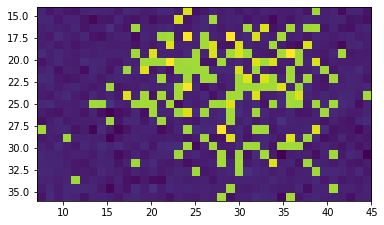

In [14]:
# Correct
# model pxy directly
M, Mbar, history = run_expr4(n_batch=500, iters=100000)

In [116]:
Mbar_joint = torch.from_numpy(np.load(f'birthwt_training_results/Mbar_joint_{50}_{99999}.npy'))
M_joint = torch.from_numpy(np.load(f'birthwt_training_results/M_joint_{50}_{99999}.npy'))

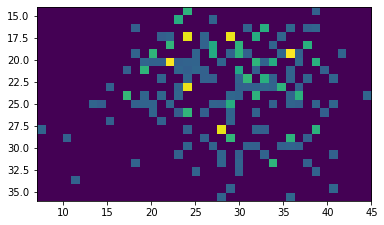

In [117]:
plt.imshow(torch.exp(Mbar_joint), extent=[7,45,36,14])

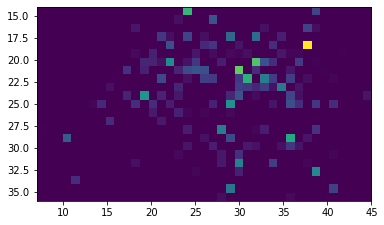

In [118]:
plt.imshow(torch.exp(M_joint), extent=[7,45,36,14])

In [145]:
# Compare Fbar=exp(Mbar) with xy
F_joint = torch.exp(Mbar_joint)
F_joint_normalized = F_joint/torch.sum(F_joint)
log_F_joint_normalized = torch.log(F_joint_normalized)

F.kl_div(log_F_joint_normalized, torch.from_numpy(xy))

tensor(5.6581e-07, dtype=torch.float64)

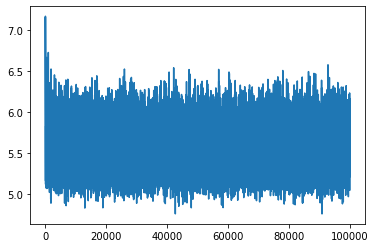

In [15]:
plt.plot(history['loss'])

In [218]:
# use F as k*p(x,y)/pxpy to recover xy
recover_xy(F_joint, xy, xyind)

tensor(-0.0009, dtype=torch.float64)


In [16]:
def run_expr5(n_batch, iters):
    '''
    model x|y and y|x
    '''
    torch.manual_seed(42)
    
    M = torch.randn(xy.shape, requires_grad = True)
    print(M[0, :5])
    
    optimizer = torch.optim.SGD([M],1, 0.99)
    Mbar = M.data
    
    history = {'loss':[]}

    for iteration in tqdm(range(1,iters)):

        samples = [np.random.choice(range(xy.reshape(-1).shape[0]), p=xy.reshape(-1)) for i in range(n_batch)]
        samples = np.array([(xi//x.shape[0], xi%x.shape[0]) for xi in samples])
#         import pdb; pdb.set_trace()
        
        optimizer.zero_grad()

        F = torch.exp(M)

        loss = 0
        for i in range(n_batch):
            lossi_x = F[samples[i,0],samples[i,1]]/torch.sum(F[samples[i,0], range(xy.shape[1])])
            lossi_y = F[samples[i,0],samples[i,1]]/torch.sum(F[range(xy.shape[0]), samples[i,1]])

            loss = loss + ((torch.log(lossi_x) + torch.log(lossi_y)) * 0.5)
            
        loss = -1*loss/n_batch
        loss.backward()
        optimizer.step()
        history['loss'].append(loss.item())
        Mbar = (1-1/iteration)*Mbar + (1/iteration)*M.data

        if iteration % 1000 == 0:
            print(torch.var(M))
            plt.imshow(Mbar.detach().cpu().numpy(), extent=[7,45,36,14])
            plt.savefig(f"birthwt_training_results/Mbar_pseudo_{n_batch}_{iteration}.png")

    np.save(f'birthwt_training_results/Mbar_pseudo_{n_batch}_{iteration}.npy', Mbar.detach().cpu().numpy())
    np.save(f'birthwt_training_results/M_pseudo_{n_batch}_{iteration}.npy', M.detach().cpu().numpy())
    np.save(f'birthwt_training_results/training_loss_pseudo_{n_batch}_{iteration}.npy', np.array(history['loss']))
    return M, Mbar, history

  0%|          | 9/99999 [00:00<19:30, 85.46it/s]

tensor([ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784], grad_fn=<SliceBackward>)


  1%|          | 1007/99999 [00:11<22:33, 73.15it/s]

tensor(18.6822, grad_fn=<VarBackward0>)


  2%|▏         | 2012/99999 [00:23<21:06, 77.35it/s]

tensor(10.5794, grad_fn=<VarBackward0>)


  3%|▎         | 3007/99999 [00:34<20:37, 78.37it/s]

tensor(9.0223, grad_fn=<VarBackward0>)


  4%|▍         | 4011/99999 [00:46<19:40, 81.31it/s]

tensor(8.5312, grad_fn=<VarBackward0>)


  5%|▌         | 5011/99999 [00:57<19:47, 79.98it/s]

tensor(7.8541, grad_fn=<VarBackward0>)


  6%|▌         | 6010/99999 [01:09<19:27, 80.53it/s]

tensor(7.8356, grad_fn=<VarBackward0>)


  7%|▋         | 7011/99999 [01:20<19:29, 79.48it/s]

tensor(7.4426, grad_fn=<VarBackward0>)


  8%|▊         | 8005/99999 [01:31<19:52, 77.17it/s]

tensor(7.1648, grad_fn=<VarBackward0>)


  9%|▉         | 9003/99999 [01:42<20:37, 73.51it/s]

tensor(7.0557, grad_fn=<VarBackward0>)


 10%|█         | 10006/99999 [01:54<20:20, 73.71it/s]

tensor(7.0983, grad_fn=<VarBackward0>)


 11%|█         | 11005/99999 [02:05<20:39, 71.79it/s]

tensor(7.3845, grad_fn=<VarBackward0>)


 12%|█▏        | 12003/99999 [02:17<19:43, 74.36it/s]

tensor(7.1127, grad_fn=<VarBackward0>)


 13%|█▎        | 13003/99999 [02:28<20:40, 70.16it/s]

tensor(7.1271, grad_fn=<VarBackward0>)


 14%|█▍        | 14010/99999 [02:39<19:02, 75.28it/s]

tensor(7.3802, grad_fn=<VarBackward0>)


 15%|█▌        | 15006/99999 [02:51<19:37, 72.17it/s]

tensor(7.3660, grad_fn=<VarBackward0>)


 16%|█▌        | 16003/99999 [03:02<21:24, 65.38it/s]

tensor(7.3316, grad_fn=<VarBackward0>)


 17%|█▋        | 17007/99999 [03:14<20:29, 67.47it/s]

tensor(7.7073, grad_fn=<VarBackward0>)


 18%|█▊        | 18001/99999 [03:25<19:26, 70.29it/s]

tensor(7.1743, grad_fn=<VarBackward0>)


 19%|█▉        | 19001/99999 [03:37<19:25, 69.47it/s]

tensor(7.4024, grad_fn=<VarBackward0>)


 20%|██        | 20004/99999 [03:48<20:11, 66.02it/s]

tensor(7.2845, grad_fn=<VarBackward0>)


 21%|██        | 21000/99999 [03:59<20:12, 65.13it/s]

tensor(7.2500, grad_fn=<VarBackward0>)


 22%|██▏       | 22000/99999 [04:10<20:06, 64.66it/s]

tensor(7.5299, grad_fn=<VarBackward0>)


 23%|██▎       | 23001/99999 [04:22<19:50, 64.69it/s]

tensor(7.5000, grad_fn=<VarBackward0>)


 24%|██▍       | 24003/99999 [04:34<19:59, 63.37it/s]

tensor(7.2527, grad_fn=<VarBackward0>)


 25%|██▌       | 25002/99999 [04:45<19:55, 62.72it/s]

tensor(7.3816, grad_fn=<VarBackward0>)


 26%|██▌       | 25999/99999 [04:56<13:45, 89.66it/s]

tensor(7.3428, grad_fn=<VarBackward0>)


 27%|██▋       | 26998/99999 [05:08<13:52, 87.73it/s]

tensor(6.9256, grad_fn=<VarBackward0>)


 28%|██▊       | 27996/99999 [05:19<13:30, 88.81it/s]

tensor(6.9133, grad_fn=<VarBackward0>)


 29%|██▉       | 28998/99999 [05:31<14:22, 82.30it/s]

tensor(7.4783, grad_fn=<VarBackward0>)


 30%|██▉       | 29997/99999 [05:43<13:15, 88.05it/s]

tensor(7.0045, grad_fn=<VarBackward0>)


 31%|███       | 30998/99999 [05:54<12:50, 89.58it/s]

tensor(7.4077, grad_fn=<VarBackward0>)


 32%|███▏      | 31997/99999 [06:05<12:32, 90.35it/s]

tensor(7.3612, grad_fn=<VarBackward0>)


 33%|███▎      | 32996/99999 [06:16<12:29, 89.44it/s]

tensor(7.4851, grad_fn=<VarBackward0>)


 34%|███▍      | 33996/99999 [06:28<12:16, 89.64it/s]

tensor(7.4396, grad_fn=<VarBackward0>)


 35%|███▌      | 35000/99999 [06:39<18:52, 57.39it/s]

tensor(7.0770, grad_fn=<VarBackward0>)


 36%|███▌      | 36001/99999 [06:51<18:25, 57.87it/s]

tensor(7.4761, grad_fn=<VarBackward0>)


 37%|███▋      | 36998/99999 [07:02<11:37, 90.29it/s]

tensor(7.0620, grad_fn=<VarBackward0>)


 38%|███▊      | 37996/99999 [07:14<11:25, 90.42it/s]

tensor(7.3572, grad_fn=<VarBackward0>)


 39%|███▉      | 39000/99999 [07:25<17:09, 59.26it/s]

tensor(6.8844, grad_fn=<VarBackward0>)


 40%|███▉      | 39997/99999 [07:36<11:02, 90.63it/s]

tensor(7.6572, grad_fn=<VarBackward0>)


 41%|████      | 40995/99999 [07:48<10:57, 89.69it/s]

tensor(7.2459, grad_fn=<VarBackward0>)


 42%|████▏     | 41991/99999 [07:59<10:48, 89.38it/s]

tensor(7.5333, grad_fn=<VarBackward0>)


 43%|████▎     | 42995/99999 [08:11<10:31, 90.23it/s]

tensor(7.1546, grad_fn=<VarBackward0>)


 44%|████▍     | 43991/99999 [08:22<10:27, 89.32it/s]

tensor(7.3608, grad_fn=<VarBackward0>)


 45%|████▍     | 44998/99999 [08:34<10:20, 88.70it/s]

tensor(7.1800, grad_fn=<VarBackward0>)


 46%|████▌     | 45990/99999 [08:45<09:56, 90.49it/s]

tensor(7.2662, grad_fn=<VarBackward0>)


 47%|████▋     | 46996/99999 [08:56<09:44, 90.67it/s]

tensor(7.2519, grad_fn=<VarBackward0>)


 48%|████▊     | 47994/99999 [09:08<10:33, 82.05it/s]

tensor(7.2019, grad_fn=<VarBackward0>)


 49%|████▉     | 48993/99999 [09:19<09:24, 90.36it/s]

tensor(7.4122, grad_fn=<VarBackward0>)


 50%|████▉     | 49993/99999 [09:31<09:15, 90.07it/s]

tensor(7.1905, grad_fn=<VarBackward0>)


 51%|█████     | 50990/99999 [09:42<09:12, 88.66it/s]

tensor(7.1690, grad_fn=<VarBackward0>)


 52%|█████▏    | 51999/99999 [09:54<09:01, 88.59it/s]

tensor(7.0801, grad_fn=<VarBackward0>)


 53%|█████▎    | 52993/99999 [10:05<08:42, 89.99it/s]

tensor(7.1237, grad_fn=<VarBackward0>)


 54%|█████▍    | 53993/99999 [10:16<08:38, 88.65it/s]

tensor(6.9946, grad_fn=<VarBackward0>)


 55%|█████▍    | 54991/99999 [10:28<08:24, 89.20it/s]

tensor(7.1938, grad_fn=<VarBackward0>)


 56%|█████▌    | 55991/99999 [10:39<08:13, 89.24it/s]

tensor(7.3820, grad_fn=<VarBackward0>)


 57%|█████▋    | 56999/99999 [10:51<08:03, 89.01it/s]

tensor(7.1778, grad_fn=<VarBackward0>)


 58%|█████▊    | 57997/99999 [11:02<07:52, 88.92it/s]

tensor(7.0839, grad_fn=<VarBackward0>)


 59%|█████▉    | 58990/99999 [11:14<07:34, 90.18it/s]

tensor(7.2700, grad_fn=<VarBackward0>)


 60%|█████▉    | 59998/99999 [11:25<07:23, 90.13it/s]

tensor(7.1273, grad_fn=<VarBackward0>)


 61%|██████    | 60993/99999 [11:37<07:14, 89.84it/s]

tensor(7.4909, grad_fn=<VarBackward0>)


 62%|██████▏   | 61993/99999 [11:48<07:03, 89.69it/s]

tensor(6.9904, grad_fn=<VarBackward0>)


 63%|██████▎   | 62998/99999 [12:00<06:51, 89.87it/s]

tensor(7.2947, grad_fn=<VarBackward0>)


 64%|██████▍   | 63999/99999 [12:11<06:37, 90.51it/s]

tensor(6.9627, grad_fn=<VarBackward0>)


 65%|██████▍   | 64990/99999 [12:23<06:27, 90.44it/s]

tensor(7.3791, grad_fn=<VarBackward0>)


 66%|██████▌   | 65995/99999 [12:34<06:24, 88.50it/s]

tensor(7.2809, grad_fn=<VarBackward0>)


 67%|██████▋   | 66999/99999 [12:45<06:15, 87.77it/s]

tensor(7.6397, grad_fn=<VarBackward0>)


 68%|██████▊   | 67992/99999 [12:57<05:52, 90.78it/s]

tensor(7.4079, grad_fn=<VarBackward0>)


 69%|██████▉   | 68990/99999 [13:08<05:40, 91.10it/s]

tensor(7.6861, grad_fn=<VarBackward0>)


 70%|██████▉   | 69990/99999 [13:20<05:33, 90.06it/s]

tensor(7.3873, grad_fn=<VarBackward0>)


 71%|███████   | 70993/99999 [13:31<05:33, 87.09it/s]

tensor(7.2343, grad_fn=<VarBackward0>)


 72%|███████▏  | 71994/99999 [13:43<05:18, 87.98it/s]

tensor(7.4164, grad_fn=<VarBackward0>)


 73%|███████▎  | 72994/99999 [13:54<04:59, 90.15it/s]

tensor(7.2195, grad_fn=<VarBackward0>)


 74%|███████▍  | 73994/99999 [14:06<04:55, 87.99it/s]

tensor(7.2948, grad_fn=<VarBackward0>)


 75%|███████▍  | 74999/99999 [14:18<04:38, 89.82it/s]

tensor(7.2018, grad_fn=<VarBackward0>)


 76%|███████▌  | 75992/99999 [14:29<04:25, 90.47it/s]

tensor(7.0778, grad_fn=<VarBackward0>)


 77%|███████▋  | 76992/99999 [14:41<04:18, 88.87it/s]

tensor(7.1073, grad_fn=<VarBackward0>)


 78%|███████▊  | 77994/99999 [14:52<04:05, 89.72it/s]

tensor(7.3839, grad_fn=<VarBackward0>)


 79%|███████▉  | 78999/99999 [15:04<03:51, 90.60it/s]

tensor(7.3949, grad_fn=<VarBackward0>)


 80%|███████▉  | 79991/99999 [15:15<03:40, 90.60it/s]

tensor(7.2876, grad_fn=<VarBackward0>)


 81%|████████  | 80996/99999 [15:27<03:29, 90.64it/s]

tensor(7.1815, grad_fn=<VarBackward0>)


 82%|████████▏ | 81992/99999 [15:39<03:38, 82.52it/s]

tensor(7.3181, grad_fn=<VarBackward0>)


 83%|████████▎ | 82994/99999 [15:51<03:10, 89.29it/s]

tensor(7.0758, grad_fn=<VarBackward0>)


 84%|████████▍ | 83990/99999 [16:02<02:58, 89.58it/s]

tensor(7.3269, grad_fn=<VarBackward0>)


 85%|████████▍ | 84995/99999 [16:14<02:49, 88.51it/s]

tensor(7.2310, grad_fn=<VarBackward0>)


 86%|████████▌ | 85991/99999 [16:25<02:35, 90.25it/s]

tensor(7.2925, grad_fn=<VarBackward0>)


 87%|████████▋ | 86997/99999 [16:37<02:24, 90.22it/s]

tensor(7.3667, grad_fn=<VarBackward0>)


 88%|████████▊ | 87994/99999 [16:48<02:21, 84.91it/s]

tensor(7.2244, grad_fn=<VarBackward0>)


 89%|████████▉ | 88994/99999 [17:00<02:02, 89.69it/s]

tensor(7.4464, grad_fn=<VarBackward0>)


 90%|████████▉ | 89995/99999 [17:12<01:53, 88.28it/s]

tensor(7.1131, grad_fn=<VarBackward0>)


 91%|█████████ | 90999/99999 [17:24<01:39, 90.07it/s]

tensor(7.5306, grad_fn=<VarBackward0>)


 92%|█████████▏| 91999/99999 [17:35<01:29, 89.44it/s]

tensor(7.2300, grad_fn=<VarBackward0>)


 93%|█████████▎| 92994/99999 [17:47<01:18, 89.58it/s]

tensor(7.1193, grad_fn=<VarBackward0>)


 94%|█████████▍| 93992/99999 [17:58<01:07, 89.55it/s]

tensor(7.5300, grad_fn=<VarBackward0>)


 95%|█████████▍| 94991/99999 [18:10<00:55, 89.65it/s]

tensor(7.1117, grad_fn=<VarBackward0>)


 96%|█████████▌| 95997/99999 [18:22<00:44, 89.06it/s]

tensor(7.1560, grad_fn=<VarBackward0>)


 97%|█████████▋| 96996/99999 [18:34<00:34, 87.23it/s]

tensor(7.1622, grad_fn=<VarBackward0>)


 98%|█████████▊| 97995/99999 [18:46<00:22, 89.65it/s]

tensor(7.3052, grad_fn=<VarBackward0>)


 99%|█████████▉| 98991/99999 [18:57<00:11, 89.55it/s]

tensor(7.3618, grad_fn=<VarBackward0>)


100%|██████████| 99999/99999 [19:09<00:00, 87.00it/s]


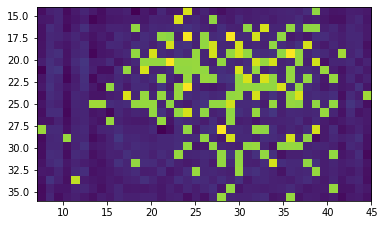

In [17]:
# Correct
# model full px|y and py|x directly
M, Mbar, history = run_expr5(n_batch=50, iters=100000)

In [126]:
Mbar_pseudo = torch.from_numpy(np.load(f'birthwt_training_results/Mbar_pseudo_{50}_{99999}.npy'))
M_pseudo = torch.from_numpy(np.load(f'birthwt_training_results/M_pseudo_{50}_{99999}.npy'))

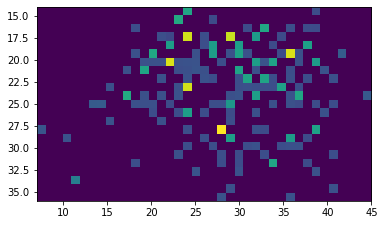

In [63]:
plt.imshow(torch.exp(Mbar_pseudo), extent=[7,45,36,14])

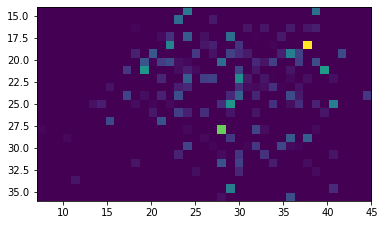

In [60]:
plt.imshow(torch.exp(M_pseudo), extent=[7,45,36,14])

In [129]:
# Compare Mbar with xy
F_pseudo = torch.exp(Mbar_pseudo)
F_pseudo_normalized = F_pseudo/torch.sum(F_pseudo)
log_F_pseudo_normalized = torch.log(F_pseudo_normalized)

F.kl_div(log_F_pseudo_normalized, torch.from_numpy(xy))

tensor(7.3230e-06, dtype=torch.float64)

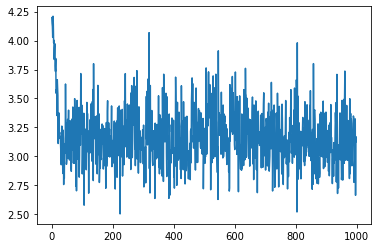

In [130]:
plt.plot(history['loss'])

In [216]:
# use F as k*p(x,y)/pxpy to recover xy
recover_xy(F_pseudo, xy, xyind)

tensor(-0.0009, dtype=torch.float64)


In [19]:
def run_expr(n_batch, iters):
    '''
    info NCE
    '''
    torch.manual_seed(42)
    
    M = torch.randn(xy.shape, requires_grad = True)
    print(M[0, :5])
    
    optimizer = torch.optim.SGD([M],1, 0.99)
    Mbar = M.data
    
    history = {'loss':[]}

    for iteration in tqdm(range(1,iters)):

        samples = [np.random.choice(range(xy.reshape(-1).shape[0]), p=xy.reshape(-1)) for i in range(n_batch)]
        samples = np.array([(xi//x.shape[0], xi%x.shape[0]) for xi in samples])
#         import pdb; pdb.set_trace()
        
        optimizer.zero_grad()

        F = torch.exp(M)

        loss = 0
        for i in range(n_batch):
#             lossi = F[samples[i,0],samples[i,1]]/torch.sum(F[samples[i,0], samples[:,1]])
            
            lossi_x = F[samples[i,0],samples[i,1]]/torch.sum(F[samples[i,0], samples[:,1]])
            lossi_y = F[samples[i,0],samples[i,1]]/torch.sum(F[samples[:,0], samples[i,1]])
            
            loss = loss + ((torch.log(lossi_x) + torch.log(lossi_y)) * 0.5)
            
        loss = -1*loss/n_batch
        loss.backward()
        optimizer.step()
        history['loss'].append(loss.item())
        Mbar = (1-1/iteration)*Mbar + (1/iteration)*M.data

        if iteration % 1000 == 0:
            print(torch.var(M))
            plt.imshow(Mbar.detach().cpu().numpy(), extent=[7,45,36,14])
            plt.savefig(f"birthwt_training_results/Mbar_infoNCE_{n_batch}_{iteration}.png")

    np.save(f'birthwt_training_results/Mbar_infoNCE_{n_batch}_{iteration}.npy', Mbar.detach().cpu().numpy())
    np.save(f'birthwt_training_results/M_infoNCE_{n_batch}_{iteration}.npy', M.detach().cpu().numpy())
    np.save(f'birthwt_training_results/training_loss_infoNCE_{n_batch}_{iteration}.npy', np.array(history['loss']))
    return M, Mbar, history

In [20]:
# Correct
# info NCE both directions
M, Mbar, history = run_expr(n_batch=50, iters=100000)

  0%|          | 9/99999 [00:00<19:24, 85.86it/s]

tensor([ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784], grad_fn=<SliceBackward>)


100%|██████████| 99999/99999 [18:20<00:00, 90.85it/s]


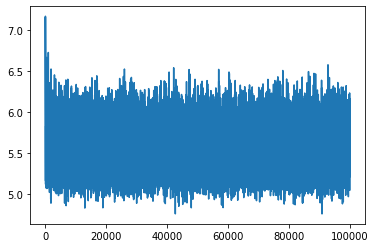

In [21]:
plt.plot(history['loss'])

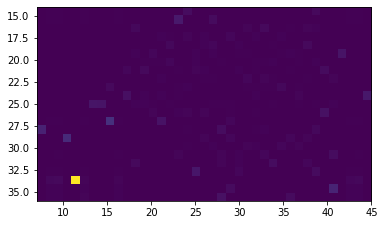

In [58]:
plt.imshow(torch.exp(Mbar.detach().cpu()), extent=[7,45,36,14])

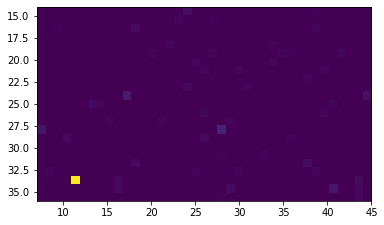

In [57]:
plt.imshow(torch.exp(M.detach().cpu()), extent=[7,45,36,14])

In [132]:
Mbar_infoNCE = torch.from_numpy(np.load(f'birthwt_training_results/Mbar_infoNCE_{50}_{99999}.npy'))
M_infoNCE = torch.from_numpy(np.load(f'birthwt_training_results/M_infoNCE_{50}_{99999}.npy'))

In [142]:
# Compare Mbar with xy
F_infoNCE = torch.exp(Mbar_infoNCE)
F_infoNCE_normalized = F_infoNCE/torch.sum(F_infoNCE)
log_F_infoNCE_normalized = torch.log(F_infoNCE_normalized)

F.kl_div(log_F_infoNCE_normalized, torch.from_numpy(xy))

tensor(0.0010, dtype=torch.float64)

In [219]:
# use F as k*p(x,y)/pxpy to recover xy
recover_xy(F_infoNCE, xy, xyind)

tensor(8.4573e-05, dtype=torch.float64)


In [58]:
def run_expr_decouple_batch_sizes(n_batch_b, n_batch_B, iters):
    '''
    info NCE, decouple batch sizes.
    '''
    torch.manual_seed(42)
    
    M = torch.randn(xy.shape, requires_grad = True)
    print(M[0, :5])
    
    optimizer = torch.optim.SGD([M],1, 0.99)
    Mbar = M.data
    
    history = {'loss':[], 'M_var':[], 'gradients':[]}
    loss_B = 0
    
    for iteration in tqdm(range(1,iters)):
        
        # Draw a batch b
        samples = [np.random.choice(range(xy.reshape(-1).shape[0]), p=xy.reshape(-1)) for i in range(n_batch_b)]
        samples = np.array([(xi//x.shape[0], xi%x.shape[0]) for xi in samples])
        
        optimizer.zero_grad()

        F = torch.exp(M)

        loss_b = 0
        for i in range(n_batch_b):
            lossi_x = F[samples[i,0],samples[i,1]]/torch.sum(F[samples[i,0], samples[:,1]])
            lossi_y = F[samples[i,0],samples[i,1]]/torch.sum(F[samples[:,0], samples[i,1]])
            
            loss_b = loss_b + ((torch.log(lossi_x) + torch.log(lossi_y)) * 0.5)
            
        loss_b = -1*loss_b/n_batch_b
        
        # Accumulate loss to batch B
        loss_B += loss_b
        
        if iteration % n_batch_B == 0:
            loss = loss_B / n_batch_B
            loss.backward()
            history['gradients'].append(torch.mean(torch.absolute(M.grad)).cpu().item())
            optimizer.step()
            history['loss'].append(loss.cpu().item())
            history['M_var'].append(torch.var(M).cpu().item())
            Mbar = (1-1/iteration)*Mbar + (1/iteration)*M.data
            loss_B = 0

        if iteration % 500 == 0:
            print(torch.var(M))
            plt.imshow(Mbar.detach().cpu().numpy(), extent=[7,45,36,14])
            plt.savefig(f"birthwt_training_bB_results/Mbar_infoNCE_bB_{n_batch_b}_{n_batch_B}_{iteration}.png")

    np.save(f'birthwt_training_bB_results/Mbar_infoNCE_bB_{n_batch_b}_{n_batch_B}_{iteration}.npy', Mbar.detach().cpu().numpy())
    np.save(f'birthwt_training_bB_results/M_infoNCE_bB_{n_batch_b}_{n_batch_B}_{iteration}.npy', M.detach().cpu().numpy())
    np.save(f'birthwt_training_bB_results/training_loss_infoNCE_bB_{n_batch_b}_{n_batch_B}_{iteration}.npy', np.array(history['loss']))
    return M, Mbar, history

  1%|          | 7/999 [00:00<00:14, 69.30it/s]

tensor([ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784], grad_fn=<SliceBackward>)


 51%|█████     | 509/999 [00:05<00:06, 78.13it/s]

tensor(20.1832, grad_fn=<VarBackward0>)


100%|██████████| 999/999 [00:11<00:00, 89.77it/s]


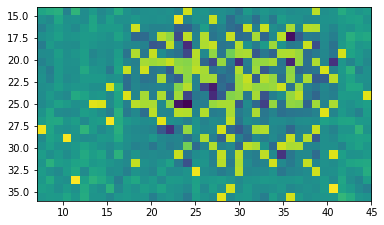

In [97]:
# Correct
# info NCE both directions
M, Mbar, history = run_expr_decouple_batch_sizes(n_batch_b=50, n_batch_B=1, iters=1000)

In [ ]:
# This is what we want!
# control for number of gradient updates and number of datapoints drawn
# (n_batch_b=5, n_batch_B=100, iters=10000) # 100 updates  # 10k * 5 datapoints
# (n_batch_b=50, n_batch_B=10, iters=1000)  # 100 updates  # 10k * 5 datapoints
# (n_batch_b=500, n_batch_B=1, iters=100)   # 100 updates  # 10k * 5 datapoints 

## (n_batch_b=5, n_batch_B=100, iters=10000)

```
- one loss   per 5by5 batch matrix
- one update per 100 losses
- 100 updates
- 50k datapoints drawn
```

In [86]:
n_batch_b=5; n_batch_B=100; iters=10000-1
Mbar_infoNCE_5_100_10000 = torch.from_numpy(np.load(f'birthwt_training_bB_results/Mbar_infoNCE_bB_{n_batch_b}_{n_batch_B}_{iters}.npy'))
M_infoNCE_5_100_10000 = torch.from_numpy(np.load(f'birthwt_training_bB_results/M_infoNCE_bB_{n_batch_b}_{n_batch_B}_{iters}.npy'))

In [226]:
# Compare Mbar with xy
F_infoNCE_5_100_10000 = torch.exp(Mbar_infoNCE_5_100_10000)
F_infoNCE_normalized_5_100_10000 = F_infoNCE_5_100_10000/torch.sum(F_infoNCE_5_100_10000)
log_F_infoNCE_normalized_5_100_10000 = torch.log(F_infoNCE_normalized_5_100_10000)

F.kl_div(log_F_infoNCE_normalized_5_100_10000, torch.from_numpy(xy))

tensor(0.0024, dtype=torch.float64)

In [227]:
# use F as k*p(x,y)/pxpy to recover xy
F_infoNCE_5_100_10000 = = torch.exp(Mbar_infoNCE_5_100_10000)
recover_xy(F_infoNCE_5_100_10000, xy, xyind)

tensor(0.0015, dtype=torch.float64)


In [252]:
# estimate K
torch.sum(F_infoNCE_5_100_10000) / np.sum(xy/xyind)

tensor(1.3540)

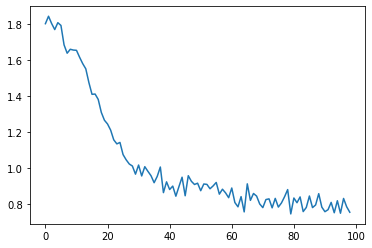

In [68]:
# Chosen
# (n_batch_b=5, n_batch_B=100, iters=10000) # 100 updates
plt.plot(history['loss'])

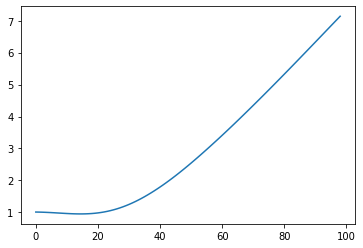

In [83]:
# Chosen
# (n_batch_b=5, n_batch_B=100, iters=10000) # 100 updates
plt.plot(history['M_var'])

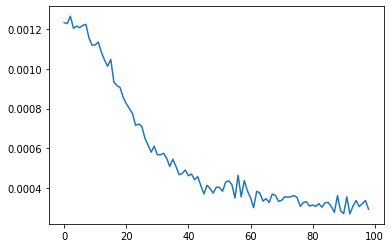

In [84]:
# Chosen
# (n_batch_b=5, n_batch_B=100, iters=10000) # 100 updates
plt.plot(history['gradients'])

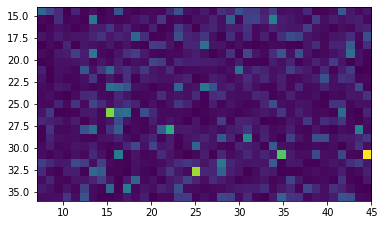

In [87]:
plt.imshow(torch.exp(Mbar_infoNCE_5_100_10000.detach().cpu()), extent=[7,45,36,14])

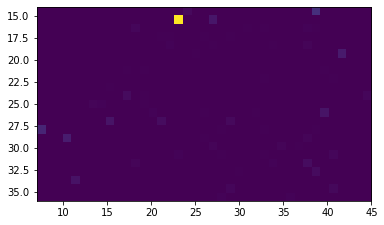

In [89]:
plt.imshow(torch.exp(M_infoNCE_5_100_10000.detach().cpu()), extent=[7,45,36,14])

## (n_batch_b=50, n_batch_B=10, iters=1000)

```
- one loss   per 50by50 batch matrix
- one update per 10 losses
- 100 updates
- 50k datapoints drawn
```

In [90]:
n_batch_b=50; n_batch_B=10; iters=1000-1
Mbar_infoNCE_50_10_1000 = torch.from_numpy(np.load(f'birthwt_training_bB_results/Mbar_infoNCE_bB_{n_batch_b}_{n_batch_B}_{iters}.npy'))
M_infoNCE_50_10_1000 = torch.from_numpy(np.load(f'birthwt_training_bB_results/M_infoNCE_bB_{n_batch_b}_{n_batch_B}_{iters}.npy'))

In [230]:
# Compare Mbar with xy
F_infoNCE_50_10_1000 = torch.exp(Mbar_infoNCE_50_10_1000)
F_infoNCE_normalized_50_10_1000 = F_infoNCE_50_10_1000/torch.sum(F_infoNCE_50_10_1000)
log_F_infoNCE_normalized_50_10_1000 = torch.log(F_infoNCE_normalized_50_10_1000)

F.kl_div(log_F_infoNCE_normalized_50_10_1000, torch.from_numpy(xy))

tensor(0.0018, dtype=torch.float64)

In [231]:
# use F as k*p(x,y)/pxpy to recover xy
F_infoNCE_50_10_1000 = torch.exp(Mbar_infoNCE_50_10_1000)
recover_xy(F_infoNCE_50_10_1000, xy, xyind)

tensor(0.0010, dtype=torch.float64)


In [251]:
# estimate K
torch.sum(F_infoNCE_50_10_1000) / np.sum(xy/xyind)

tensor(1.3103)

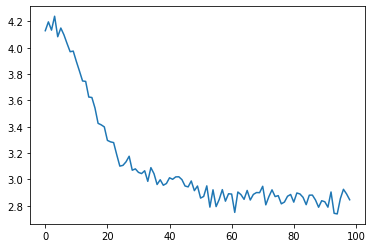

In [60]:
# Chosen
# (n_batch_b=50, n_batch_B=10, iters=1000) # 100 updates
plt.plot(history['loss'])

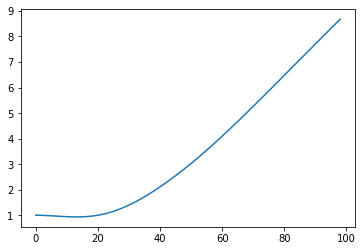

In [61]:
# (n_batch_b=50, n_batch_B=10, iters=1000) # 100 updates
plt.plot(history['M_var'])

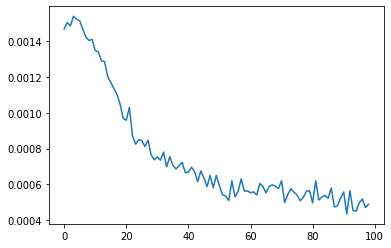

In [62]:
# (n_batch_b=50, n_batch_B=10, iters=1000) # 100 updates
plt.plot(history['gradients'])

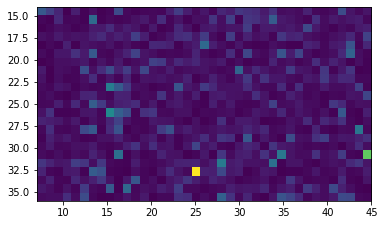

In [91]:
plt.imshow(torch.exp(Mbar_infoNCE_50_10_1000.detach().cpu()), extent=[7,45,36,14])

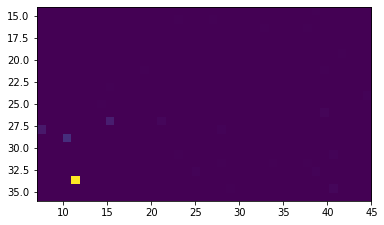

In [92]:
plt.imshow(torch.exp(M_infoNCE_50_10_1000.detach().cpu()), extent=[7,45,36,14])

## (n_batch_b=500, n_batch_B=1, iters=100)

```
- one loss   per 500by500 batch matrix
- one update per 1 losses
- 100 updates
- 50k datapoints drawn
```

In [104]:
n_batch_b=500; n_batch_B=1; iters=100-1
Mbar_infoNCE_500_1_100 = torch.from_numpy(np.load(f'birthwt_training_bB_results/Mbar_infoNCE_bB_{n_batch_b}_{n_batch_B}_{iters}.npy'))
M_infoNCE_500_1_100 = torch.from_numpy(np.load(f'birthwt_training_bB_results/M_infoNCE_bB_{n_batch_b}_{n_batch_B}_{iters}.npy'))

In [232]:
# Compare Mbar with xy
F_infoNCE_500_1_100 = torch.exp(Mbar_infoNCE_500_1_100)
F_infoNCE_normalized_500_1_100 = F_infoNCE_500_1_100/torch.sum(F_infoNCE_500_1_100)
log_F_infoNCE_normalized_500_1_100 = torch.log(F_infoNCE_normalized_500_1_100)

F.kl_div(log_F_infoNCE_normalized_500_1_100, torch.from_numpy(xy))

tensor(0.0005, dtype=torch.float64)

In [233]:
# use F as k*p(x,y)/pxpy to recover xy
F_infoNCE_500_1_100 = torch.exp(Mbar_infoNCE_500_1_100)
recover_xy(F_infoNCE_500_1_100, xy, xyind)

tensor(-0.0004, dtype=torch.float64)


In [250]:
# estimate K
torch.sum(F_infoNCE_500_1_100) / np.sum(xy/xyind)

tensor(4.6142)

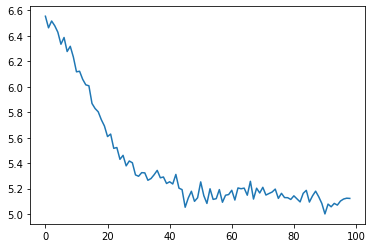

In [77]:
# Chosen
# (n_batch_b=500, n_batch_B=1, iters=100) # 100 updates
plt.plot(history['loss'])

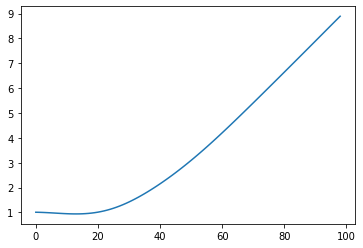

In [78]:
# Chosen
# (n_batch_b=500, n_batch_B=1, iters=100) # 100 updates
plt.plot(history['M_var'])

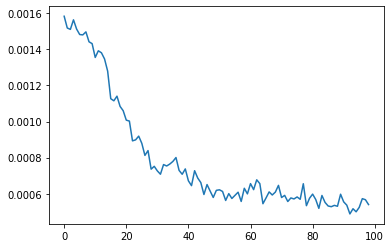

In [80]:
# Chosen
# (n_batch_b=500, n_batch_B=1, iters=100) # 100 updates
plt.plot(history['gradients'])

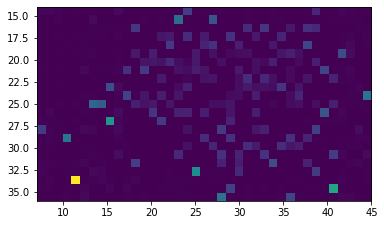

In [94]:
plt.imshow(torch.exp(Mbar_infoNCE_500_1_100.detach().cpu()), extent=[7,45,36,14])

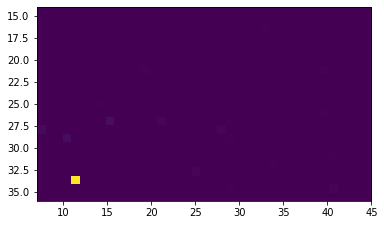

In [95]:
plt.imshow(torch.exp(M_infoNCE_500_1_100.detach().cpu()), extent=[7,45,36,14])

## (n_batch_b=50, n_batch_B=1, iters=1000)

```
- one loss   per 50by50 batch matrix
- one update per 1 losses
- 1000updates
- 50k datapoints drawn
```

In [236]:
n_batch_b=50; n_batch_B=1; iters=1000-1
Mbar_infoNCE_50_1_1000 = torch.from_numpy(np.load(f'birthwt_training_bB_results/Mbar_infoNCE_bB_{n_batch_b}_{n_batch_B}_{iters}.npy'))
M_infoNCE_50_1_1000 = torch.from_numpy(np.load(f'birthwt_training_bB_results/M_infoNCE_bB_{n_batch_b}_{n_batch_B}_{iters}.npy'))

In [237]:
# Compare Mbar with xy
F_infoNCE_50_1_1000 = torch.exp(Mbar_infoNCE_50_1_1000)
F_infoNCE_normalized_50_1_1000 = F_infoNCE_50_1_1000/torch.sum(F_infoNCE_50_1_1000)
log_F_infoNCE_normalized_50_1_1000 = torch.log(F_infoNCE_normalized_50_1_1000)

F.kl_div(log_F_infoNCE_normalized_50_1_1000, torch.from_numpy(xy))

tensor(0.0005, dtype=torch.float64)

In [243]:
# use F as k*p(x,y)/pxpy to recover xy
F_infoNCE_50_1_1000 = torch.exp(Mbar_infoNCE_50_1_1000)
recover_xy(F_infoNCE_50_1_1000, xy, xyind)

tensor(-0.0004, dtype=torch.float64)


In [249]:
# estimate K
torch.sum(F_infoNCE_50_1_1000) / np.sum(xy/xyind)

tensor(371.6849)

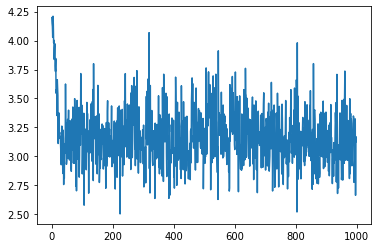

In [99]:
# Chosen
# (n_batch_b=50, n_batch_B=1, iters=1000) # 1000 updates
plt.plot(history['loss'])

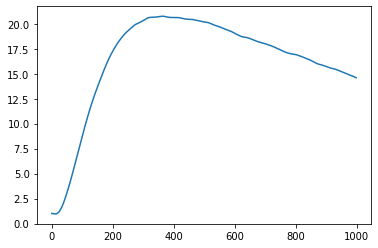

In [100]:
# Chosen
# (n_batch_b=50, n_batch_B=1, iters=1000) # 1000 updates
plt.plot(history['M_var'])

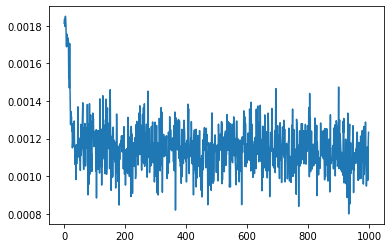

In [101]:
# Chosen
# (n_batch_b=50, n_batch_B=1, iters=1000) # 1000 updates
plt.plot(history['gradients'])

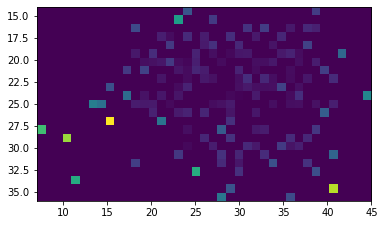

In [109]:
plt.imshow(torch.exp(Mbar_infoNCE_50_1_1000.detach().cpu()), extent=[7,45,36,14])

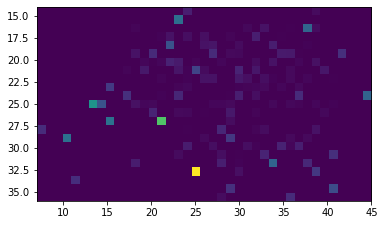

In [110]:
plt.imshow(torch.exp(M_infoNCE_50_1_1000.detach().cpu()), extent=[7,45,36,14])

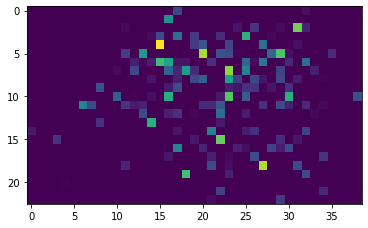

In [113]:
plt.imshow(torch.exp(M_infoNCE_50_1_1000.detach().cpu())*xyind)

In [ ]:
# This is what we want!
# control for number of gradient updates and number of datapoints drawn
# (n_batch_b=5, n_batch_B=100, iters=10000) # 100 updates  # 10k * 5 datapoints
# (n_batch_b=50, n_batch_B=10, iters=1000)  # 100 updates  # 10k * 5 datapoints
# (n_batch_b=500, n_batch_B=1, iters=100)   # 100 updates  # 10k * 5 datapoints 

In [ ]:
# Not what we want
# controls for number of b by b matrices drawn
# (n_batch_b=5, n_batch_B=100, iters=10000) # 10000 matrices  # 10k * 5 datapoints
# (n_batch_b=50, n_batch_B=10, iters=10000) # 10000 matrices  # 10k * 50 datapoints
# (n_batch_b=500, n_batch_B=10, iters=10000) # 10000 matrices # 10k * 500 datapoints

In [ ]:
# This is what we want!
# (n_batch_b=50, n_batch_B=10, iters=1000)  # 100 updates  # 10k * 5 datapoints
# (n_batch_b=50, n_batch_B=1, iters=1000)  # 1000 updates  # 10k * 5 datapoints